In [ ]:
# Load content and style images (see example in the attached colab).
content_image = plt.imread(content_image_path)
style_image = plt.imread(style_image_path)
# Convert to float32 numpy array, add batch dimension, and normalize to range [0, 1]. Example using numpy:
content_image = content_image.astype(np.float32)[np.newaxis, ...] / 255.
style_image = style_image.astype(np.float32)[np.newaxis, ...] / 255.
# Optionally resize the images. It is recommended that the style image is about
# 256 pixels (this size was used when training the style transfer network).
# The content image can be any size.
style_image = tf.image.resize(style_image, (256, 256))

# Load image stylization module.
hub_module = hub.load('https://kaggle.com/models/google/arbitrary-image-stylization-v1/frameworks/TensorFlow1/variations/256/versions/1')

# Stylize image.
outputs = hub_module(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib.pyplot as mpl
mpl.rcParams['figure.figsize'] = (12,12)    # 차트의 크기 설정
mpl.rcParams['axes.grid'] = False           # 차트 내 격자선(grid) 표시 여부

import numpy as np
import PIL.Image
import time
import functools

In [2]:
def tensor_to_image(tensor):
  tensor = tensor * 255

  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0]==1  # 텐서의 첫번째 차원이 1이 아니면 프로그램 종료
    tensor=tensor[0]          #4차원(1,424,512,3) -> 3차원(424,512,3)

  return PIL.Image.fromarray(tensor)

In [3]:
def load_img(path_to_img):    # 이미지를 불러오는 함수를 정의하고, 최대 이미지 크기를 512개의 픽셀로 제한한다.
  max_dim=512
  img=tf.io.read_file(path_to_img)
  img=tf.image.decode_image(img,channels=3)   #int 형 [0,255]

  img=tf.image.convert_image_dtype(img,tf.float32)   #float형 [0,1]


  shape=tf.cast(tf.shape(img)[:-1],tf.float32)


  long_dim=max(shape)
  scale=max_dim/long_dim
  new_shape=tf.cast(shape*scale,tf.int32)

  img=tf.image.resize(img,new_shape)
  img=img[tf.newaxis,:]

  return img

  def imshow(image,title=None):
    if len(image.shape) > 3:
      image=tf.squeeze(image,axis=0)     # (1,422,512,3) -> (422,512,3)

    plt.imshow(image)
    if title:
      plt.title(title)

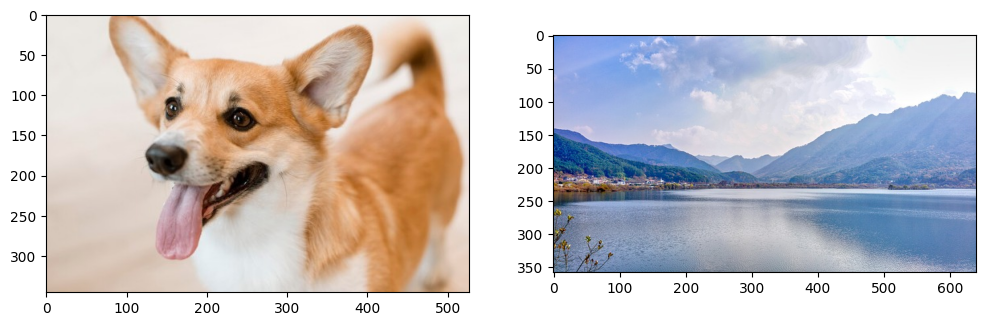

In [19]:
content_image=image.load_img('/content/dev_dog1.jpeg')
content_image=image.img_to_array(content_image)
content_image=content_image/255

style_image=image.load_img('/content/reservoir-7375340_640.jpg')
style_image=image.img_to_array(style_image)
style_image=style_image/255

plt.subplot(1,2,1)
plt.imshow(content_image)

plt.subplot(1,2,2)
plt.imshow(style_image)

In [20]:
content_image=content_image[np.newaxis,:]
style_image=style_image[np.newaxis,:]

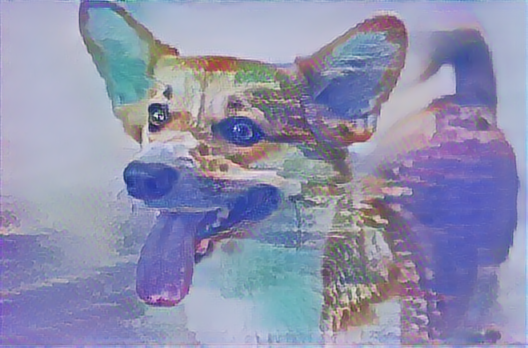

In [21]:
import tensorflow_hub as hub
hub_module = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)